# Audio Sales Analysis

This project involves analyzing data for a wholesale audio equipment company offering a wide range of products, including professional audio systems, home theaters, portable audio devices, and accessories. The company collaborates with large retail chains and specialized stores.
Customers submit purchase requests through a CRM system, after which sales managers contact them to finalize orders, which are either confirmed or canceled.
The objective of the project is to analyze sales and customer data to extract actionable insights and support business decision-making.

### Data description:
The dataset contains the following fields:

* **df_orders - order data:** order_id, product_id, quantity, date

A single order can include multiple different products. If an order was canceled and then recreated (by the same client, with the same products, and the same manager), the database will keep records of both orders with different numbers and statuses, since the system does not allow creating an order with the same number.

* **df_order_status - order status and client data:** order_id, client_id, status (confirmed/canceled)

* **df_products - product data:** id, name, price(in USD), category

# Importing Libraries and Dataset

In [517]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(15,4)}, style="white")

In [519]:
orders = pd.read_csv('df_orders.csv', index_col=0)
orders.head()

,order_id,product_id,quantity,date
0,DUEU-27693834,933,7,2024-03-01
1,DUEU-27693834,1645,36,2024-03-01
2,DUEU-27693834,1596,40,2024-03-01
3,DUEU-27693834,648,10,2024-03-01
4,DUEU-27693834,1413,6,2024-03-01


In [521]:
order_status = pd.read_csv('df_order_status.csv')
order_status.head()

,order_id,client_id,status
0,DUEU-27693834,14,confirmed
1,VHJV-14331014,43,confirmed
2,MSXQ-45152143,61,confirmed
3,LOSS-76956574,94,confirmed
4,OPAU-19106120,33,confirmed


In [523]:
products = pd.read_csv('df_products.csv', index_col=0)
products.head()

,id,name,price,category
0,36,"Anthem, AVM 70",2580.03,AV Processor
1,40,"Arcam, AV860",3400.64,AV Processor
2,41,"Arcam, AVR30",3600.85,AV Processor
3,205,"Denon, AVC-X8500H",3600.95,AV Processor
4,206,"Denon, AVC-X6700H",2225.50,AV Processor


# Exploratory Data Analysis (EDA)

**1. df orders**

In [527]:
orders.dtypes

order_id      object
product_id     int64
quantity       int64
date          object
dtype: object

In [529]:
orders.nunique()

order_id       346
product_id    1201
quantity        33
date            31
dtype: int64

In [531]:
orders.date.min(), orders.date.max()

('2024-03-01', '2024-03-31')

In [533]:
orders.isna().sum()

order_id      0
product_id    0
quantity      0
date          0
dtype: int64

**2. df order_status**

In [536]:
order_status.dtypes

order_id     object
client_id     int64
status       object
dtype: object

In [538]:
order_status.nunique()

order_id     346
client_id     74
status         2
dtype: int64

In [540]:
order_status.status.unique()

array(['confirmed', 'canceled'], dtype=object)

In [542]:
order_status.isna().sum()

order_id     0
client_id    0
status       0
dtype: int64

**3. df products**

In [545]:
products.dtypes

id            int64
name         object
price       float64
category     object
dtype: object

In [547]:
products.nunique()

id          1677
name        1677
price       1634
category      26
dtype: int64

In [549]:
products.isna().sum()

id          0
name        0
price       0
category    0
dtype: int64

### EDA Summary:
* Datasets contain 346 unique orders, comprising 1,201 unique products, which indicates that individual orders can include multiple products. The data covers the period of March 2024.
* They also include 74 unique clients, each potentially placing multiple orders, with two possible order statuses: confirmed or canceled.
* There are no missing values in datasets.
* The 'date' column is of object type, so for proper analysis, we need to convert it to datetime format.tetime format.

# Data Preprocessing

In [553]:
# convert dates to date format
orders['date'] = pd.to_datetime(orders['date'])

In [555]:
# extract parts of dates
orders['year'] = orders['date'].dt.year
orders['month'] = orders['date'].dt.month
orders['month'] = orders['date'].dt.month_name()
orders['day'] = orders['date'].dt.day
orders['weekday'] = orders['date'].dt.day_name()

In [557]:
# rename the column
products = products.rename(columns={'id': 'product_id'})

In [559]:
# create full df
df_temp = pd.merge(orders, order_status, on='order_id', how='left')
df = pd.merge(df_temp, products, on='product_id', how='left')

In [561]:
df.head()

,order_id,product_id,quantity,date,year,month,day,weekday,client_id,status,name,price,category
0,DUEU-27693834,933,7,2024-03-01,2024,March,1,Friday,14,confirmed,"Magnat, MC 400",430.56,Karaoke System
1,DUEU-27693834,1645,36,2024-03-01,2024,March,1,Friday,14,confirmed,"Yamaha, HPH-50B",41.78,Wired Headphones
2,DUEU-27693834,1596,40,2024-03-01,2024,March,1,Friday,14,confirmed,"Yamaha, YH-E700A",304.02,Wireless Headphones
3,DUEU-27693834,648,10,2024-03-01,2024,March,1,Friday,14,confirmed,"JBL, Arena 125C",217.75,Center Channel Speaker
4,DUEU-27693834,1413,6,2024-03-01,2024,March,1,Friday,14,confirmed,"Singtrix, Home Karaoke System",315.88,Karaoke System


# Analysis

## Q1. Orders by Dates

In [565]:
# df by dates
df_by_dates = df.groupby('date', as_index=False)\
    .agg({'order_id': 'nunique', 'day': 'first', 'weekday': 'first'})\
    .rename(columns={'order_id': 'orders_count'})
df_by_dates.head()

,date,orders_count,day,weekday
0,2024-03-01,22,1,Friday
1,2024-03-02,2,2,Saturday
2,2024-03-03,1,3,Sunday
3,2024-03-04,10,4,Monday
4,2024-03-05,18,5,Tuesday


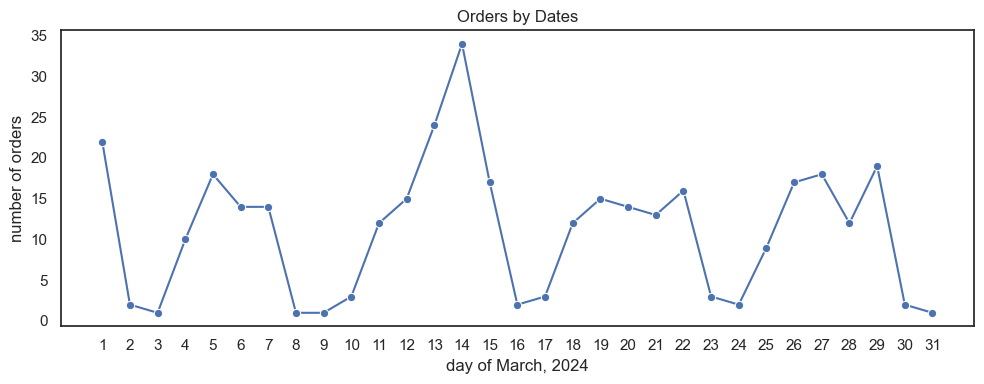

In [683]:
sns.set(rc={'figure.figsize':(10,4)}, style="white")

ax = sns.lineplot(x='day', y='orders_count', data=df_by_dates, marker='o')
ax.set_title('Orders by Dates')
ax.set_xlabel('day of March, 2024')
ax.set_ylabel('number of orders')

plt.xticks(df_by_dates['day'])
plt.tight_layout()
plt.show()

In [569]:
# max number of orders
max_orders = df_by_dates['orders_count'].max()
max_orders

34

In [571]:
# date of max number of orders
max_dates = df_by_dates.loc[df_by_dates['orders_count'] == max_orders, 'date']
max_dates

13   2024-03-14
Name: date, dtype: datetime64[ns]

In [573]:
# min number of orders
min_orders = df_by_dates['orders_count'].min()
min_orders

1

In [575]:
# date of min number of orders
min_dates = df_by_dates.loc[df_by_dates['orders_count'] == min_orders, 'date']
min_dates

2    2024-03-03
7    2024-03-08
8    2024-03-09
30   2024-03-31
Name: date, dtype: datetime64[ns]

## Q1 Summary:
* During the analyzed period, the number of orders showed fluctuations, with both increases and decreases over time.
* The maximum number of orders was recorded on 2024-03-14 (34 orders), while the minimum occurred on several dates (1 order each).

## Q2. Analysis of Confirmed vs Canceled Orders

In [579]:
# df by dates for confirmed vs canceled orders
df_by_status = df.groupby(['date', 'status'], as_index=False)\
    .agg({'order_id': 'nunique', 'day': 'first', 'weekday': 'first'})\
    .rename(columns={'order_id': 'orders_count'})
df_by_status.head()

,date,status,orders_count,day,weekday
0,2024-03-01,canceled,2,1,Friday
1,2024-03-01,confirmed,20,1,Friday
2,2024-03-02,confirmed,2,2,Saturday
3,2024-03-03,confirmed,1,3,Sunday
4,2024-03-04,confirmed,10,4,Monday


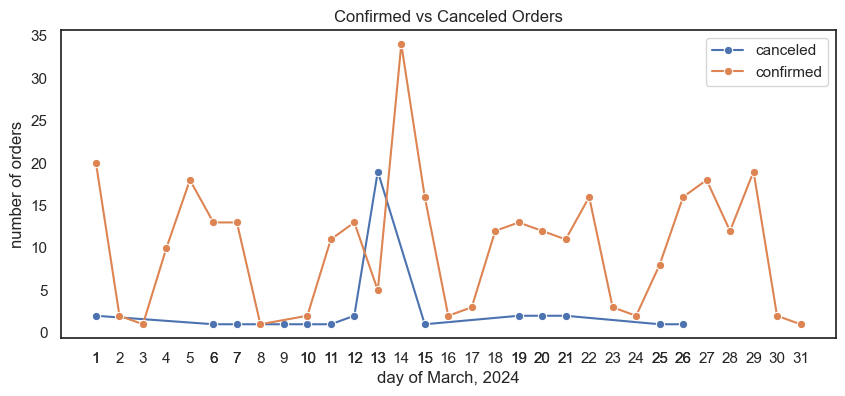

In [691]:
# plot confirmed vs canceled orders
sns.set(rc={'figure.figsize':(10,4)}, style="white")
ax = sns.lineplot(data=df_by_status, x='day', y='orders_count', hue='status', marker='o')
plt.title('Confirmed vs Canceled Orders')
ax.set_xlabel('day of March, 2024')
ax.set_ylabel('number of orders')

plt.xticks(df_by_status['day'])
plt.legend()

In [583]:
# max number of confirmed orders
max_confirmed_orders = df_by_status.query('status == "confirmed"')['orders_count'].max()
max_confirmed_orders

34

In [585]:
# date of max number of confirmed orders
max_confirmed_dates = df_by_status.query('status == "confirmed"')\
    .loc[df_by_status['orders_count'] == max_confirmed_orders, 'date']
max_confirmed_dates

20   2024-03-14
Name: date, dtype: datetime64[ns]

In [587]:
# the number of canceled orders on the date of max number of confirmed orders
df_by_status.query('date.isin(@max_confirmed_dates) and status == "canceled"')['orders_count'].sum()

0

In [589]:
# max number of canceled orders
max_canceled_orders = df_by_status.query('status == "canceled"')['orders_count'].max()
max_canceled_orders

19

In [591]:
# date of max number of canceled orders
max_canceled_dates = df_by_status.query('status == "canceled"')\
    .loc[df_by_status['orders_count'] == max_canceled_orders, 'date']
max_canceled_dates

18   2024-03-13
Name: date, dtype: datetime64[ns]

In [593]:
# the number of confermed orders on the date of max number of canceled orders
df_by_status.query('date.isin(@max_canceled_dates) and status == "confirmed"')['orders_count'].sum()

5

## Q2 Summary:
* The daily order trends show that confirmed orders dominate over canceled ones.
* There are significant spikes around the 2 days of the month, with the maximum confirmed orders on the March, 14 (34 orders) when zero orders where canceled. The maximum canceled orders was observed on the previous date - March, 13 (19 orders) when the confirmed number of orders was 5. These dates need to by analysed separately.

## Q3. Analysis of unusual data

As we have already established, the maximum number of confirmed orders was on March, 14 - 34 orders, while on that day there were no canceled orders.

On the previous day, March, 13, the minimum number of confirmed orders was recorded - 5 orders compared to 19 canceled orders.

In [598]:
# canceled orders on March, 13
canceled_1303 = df.query('day == 13 and status == "canceled"')\
    .groupby('order_id', as_index=False)\
    .agg({'product_id': 'nunique', 'client_id': 'max', 'quantity':'sum'})

In [600]:
# confirmed orders on March, 14
confirmed_1403 = df.query('day == 14 and status == "confirmed"')\
    .groupby('order_id', as_index=False)\
    .agg({'product_id': 'nunique', 'client_id': 'max', 'quantity':'sum'})

In [602]:
# consider orders with the same product_id, manager, client_id, and quantity as orders that were canceled and then placed again
# merge df's using these data
canceled_vs_confirmed = pd.merge(canceled_1303, confirmed_1403, 
                                 on=['product_id', 'client_id', 'quantity'], 
                                 how='inner')

In [604]:
canceled_vs_confirmed.head()

,order_id_x,product_id,client_id,quantity,order_id_y
0,AFIH-00611801,11,43,192,FDEB-71487438
1,BBFJ-27674101,14,73,294,UETB-44283966
2,CLBQ-63032648,13,60,205,IECD-18739530
3,CYJY-07359557,13,56,316,WNMY-98871151
4,GHGB-88045656,4,7,42,JUGG-73806170


In [606]:
# calculate percentage of orders canceled on March, 13 in orders that were reordered on March, 14
round((canceled_vs_confirmed.shape[0] / confirmed_1403.shape[0]) * 100, 2)

47.06

## Q3 Summary:
* It turns out that almost half of the orders on March, 14 were orders that had been canceled on March, 13 and then reordered on March, 14.
* This may indicates a failure in the CRM system, which prevented customers from confirming their orders. As a result, all orders created on the first day were automatically canceled, forcing customers to place them again the next day.

## Q4. Revenue & AOV by dates

In [610]:
# calculate revenue
df['revenue'] = df.quantity * df.price

In [612]:
# df for metrics for confirmed orders
metrics_per_dates = df.query('status == "confirmed"')\
    .groupby('date', as_index=False)\
    .agg({'revenue': 'sum', 'order_id': 'nunique', 'quantity' : 'sum', 'day': 'first' })\
    .rename(columns={'order_id': 'confirmed_orders_count'})

In [614]:
# calculate AOV per date
metrics_per_dates['AOV_per_confirmed_order'] = round(metrics_per_dates.revenue / metrics_per_dates.confirmed_orders_count, 2)

In [616]:
metrics_per_dates.head()

,date,revenue,confirmed_orders_count,quantity,day,AOV_per_confirmed_order
0,2024-03-01,1710786.23,20,5112,1,85539.31
1,2024-03-02,131076.28,2,510,2,65538.14
2,2024-03-03,27902.31,1,146,3,27902.31
3,2024-03-04,701274.51,10,2721,4,70127.45
4,2024-03-05,980009.92,18,3988,5,54445.00


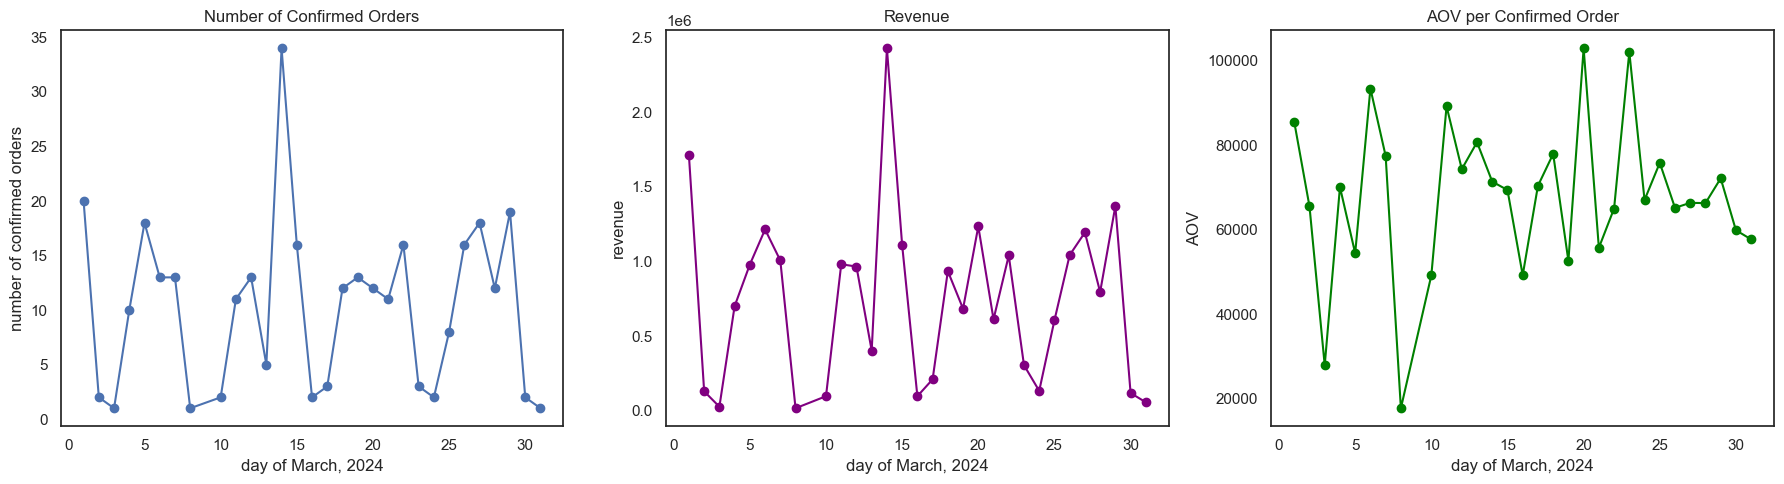

In [618]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# number of orders
axes[0].plot(metrics_per_dates['day'], metrics_per_dates['confirmed_orders_count'], marker='o')
axes[0].set_title('Number of Confirmed Orders')
axes[0].set_xlabel('day of March, 2024')
axes[0].set_ylabel('number of confirmed orders')
axes[0].tick_params(axis='x')

# revenue
axes[1].plot(metrics_per_dates['day'], metrics_per_dates['revenue'], color='purple', marker='o')
axes[1].set_title('Revenue')
axes[1].set_xlabel('day of March, 2024')
axes[1].set_ylabel('revenue')
axes[1].tick_params(axis='x')

# AOV per order
axes[2].plot(metrics_per_dates['day'], metrics_per_dates['AOV_per_confirmed_order'], color='green', marker='o')
axes[2].set_title('AOV per Confirmed Order')
axes[2].set_xlabel('day of March, 2024')
axes[2].set_ylabel('AOV')
axes[2].tick_params(axis='x')

plt.tight_layout()
plt.show()

## Q4 Summary:
* The March 2024 data shows a highly volatile business where Number of Confirmed Orders and Revenue move together very closely.
* As we found earlier, March 13-14 shows the month's highest volumes with about 34 orders and 2.5M in revenue. We previously identified that half of the March, 14 orders were reorders from customers whose orders were cancelled on March, 13 highly possible due to CRM issues.
* Throughout the rest of March, both order volume and revenue fluctuate significantly from day to day, while AOV per order shows much more variation than expected, ranging from around 20,000 to over 100,000.
* The strong connection between Number of Confirmed Orders and Revenue confirms that order volume is the primary driver of daily performance, though the varying AOV suggests there may be different types of orders or customers that significantly impact individual transaction values on certain days.

## Q5. Products analysis
For the product analysis, **only confirmed orders were considered** in order to assess the actual popularity of categories and brands, as well as their real contribution to revenue.

In [622]:
# extract brand name
df['brand'] = df['name'].str.extract(r'^([^,]+)')

In [624]:
# df by brands
brands = df.query('status == "confirmed"')\
    .groupby('brand', as_index=False)\
    .agg({'category': 'first', 'client_id': 'nunique', 'order_id': 'nunique', 'revenue': 'sum', 'quantity': 'sum'})\
    .rename(columns={'client_id': 'unique_clients', 'order_id': 'confirmed_orders_count'})
brands['revenue_k'] = round(brands.revenue / 1000, 2)

In [626]:
brands.head()

,brand,category,unique_clients,confirmed_orders_count,revenue,quantity,revenue_k
0,AKG,Wired Headphones,18,20,49153.36,537,49.15
1,ART,Preamplifier,2,2,291.06,7,0.29
2,ASUS,Headset,2,3,2993.17,41,2.99
3,Amazon,Smart Speaker,12,12,21849.04,376,21.85
4,Anker,Wireless Speakers,24,34,70355.74,1064,70.36


**1. Analysis of categories**

In [629]:
orders_by_category = brands.groupby('category', as_index=False)\
    .agg({'confirmed_orders_count': 'nunique'})\
    .sort_values('confirmed_orders_count', ascending=False).head(10)

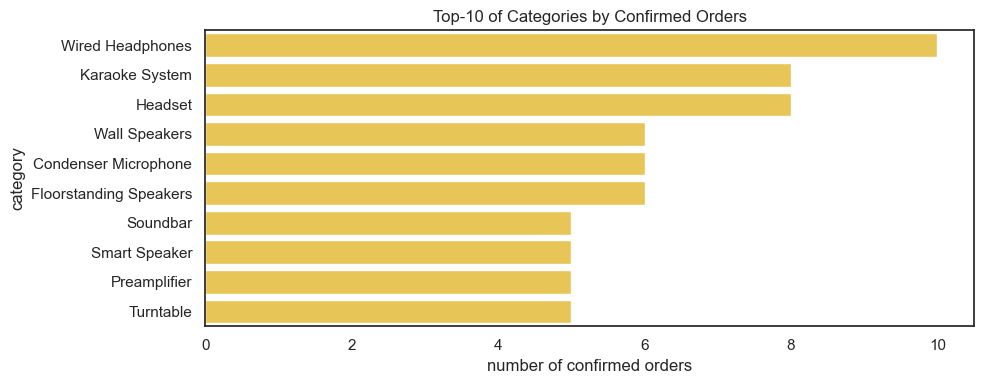

In [631]:
sns.set(rc={'figure.figsize':(10,4)}, style="white")
sns.barplot(data = orders_by_category, x = 'confirmed_orders_count', y = 'category', color='#FFD23F')

plt.title('Top-10 of Categories by Confirmed Orders')
plt.xlabel('number of confirmed orders')
plt.ylabel('category')
plt.tight_layout()
plt.show()

'Wired Headphones' is the absolute leader among product categories by the number of confirmed orders, with 10 orders. 'Karaoke System' and 'Headset' follow the leader with 8 orders each, and are followed by 'Wall Speakers', 'Condenser Microphones', and 'Floorstanding Speakers' (6 orders each). Other categories show lower numbers of confirmed orders. The data suggest that traditional wired audio equipment is currently the most popular product category.

**2. Distribution for Brands**

Histograms are needed to quickly understand the distribution of key metrics and identify which brands are worth focusing on.

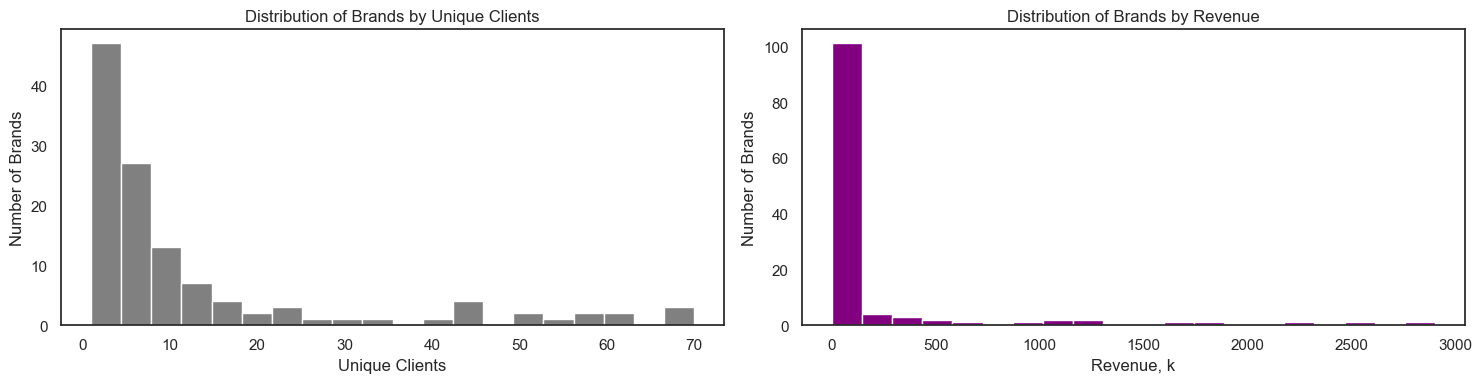

In [697]:
# unique clients
sns.set(rc={'figure.figsize':(15,4)}, style="white")

plt.subplot(1,2,1)
plt.hist(brands['unique_clients'], bins=20, color='grey')
plt.xlabel('Unique Clients')
plt.ylabel('Number of Brands')
plt.title('Distribution of Brands by Unique Clients')

# revenue, k
plt.subplot(1,2,2)
plt.hist(brands['revenue_k'], bins=20, color='purple')
plt.xlabel('Revenue, k')
plt.ylabel('Number of Brands')
plt.title('Distribution of Brands by Revenue')

plt.tight_layout()
plt.show()

* The distribution of clients across brands shows a “long-tail” pattern: the majority of brands (40–45) have only 1–5 clients and the number of brands drops as the client base increases. Only a few brands have 10–20 clients, but there is also several unexpectable increases ob brands for 40-70 clients. However, all these indicate that only a small number of brands achieve mass reach, while most remain niche.
* The main peak is among brands with low revenue (<100k). A few brands stand out with high revenue (200–3000k), but they are very rare.
So, most brands don’t generate significant revenue, but there are a few leaders with high revenue.
* For further analysis, we will focus on brands with more than 20 unique clients.

**3. Unique Clients vs Revenue Analysis**

In [640]:
# brands with more that 20 clients
top_brands = brands.query('unique_clients > 20')

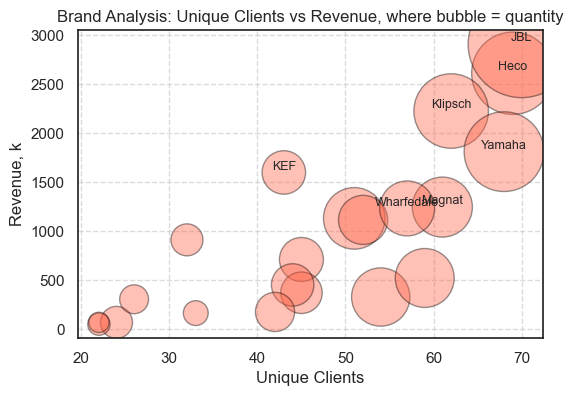

In [642]:
plt.figure(figsize=(6,4))

plt.scatter(top_brands['unique_clients'], top_brands['revenue_k'], s=top_brands['quantity'] / 2,
            alpha=0.4, c='tomato', edgecolors='black')

top_top_brands = top_brands.nlargest(7, 'revenue_k')
for _, row in top_top_brands.iterrows():
    plt.text(row['unique_clients'], row['revenue_k'], row['brand'], fontsize=9, ha='center', va='bottom')

plt.title("Brand Analysis: Unique Clients vs Revenue, where bubble = quantity")
plt.xlabel("Unique Clients")
plt.ylabel("Revenue, k")
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

* The chart shows market leaders: JBL and Heco dominate the market with the highest revenue (app. USD 2.5-3 M) and largest client bases (around 70 clients). Their large bubble sizes indicate they also buy the highest quantities.
* Klipsch and Yamaha occupy have solid revenue (app. USD 2.5-3 M) and substantial client counts (around 60-70), also showing large quantities sold. These brands have strong market positions but trail the top performers.
* KEF generate significant revenue (around USD 1.7 M) with fewer clients (around 45), suggesting higher average order values or premium pricing.
* Wharfedale and Magnat cluster around (around USD 1-1.5 M) revenue with 55-60 clients.
* Multiple brands occupy the lower-left portion with fewer than 50 clients and under 1,000 revenue.
* There's a strong positive correlation between client count and revenue across most brands. The quantity dimension (bubble size) generally aligns with
* The market shows clear segmentation between major players and smaller ones.

## Q5 Summary:
The audio equipment market shows a clear concentration: a small number of categories and brands account for the majority of orders and revenue, while most categories and brands remain niche with limited clients and low sales. The distribution of clients and revenue follows a “long-tail” pattern, with most brands having few clients and low revenue, and only a few achieving mass reach and significant income.

## Q6. Clients analysis
For the client analysis, only confirmed orders were considered.

In [647]:
clients = df.query('status == "confirmed"')\
    .groupby('client_id', as_index=False)\
    .agg({'order_id': 'nunique', 'quantity': 'sum', 'revenue': 'sum'})\
    .rename(columns={'order_id': 'confirmed_orders_count'})
clients['revenue_k'] = round(clients.revenue / 1000, 2)

In [649]:
# calculate average order
clients['average_order'] = round(clients.quantity / clients.confirmed_orders_count, 2)

In [651]:
clients.head()

,client_id,confirmed_orders_count,quantity,revenue,revenue_k,average_order
0,3,1,48,12798.24,12.80,48.00
1,5,1,60,19431.46,19.43,60.00
2,7,3,178,42525.23,42.53,59.33
3,8,2,132,43464.93,43.46,66.00
4,10,3,797,307507.76,307.51,265.67


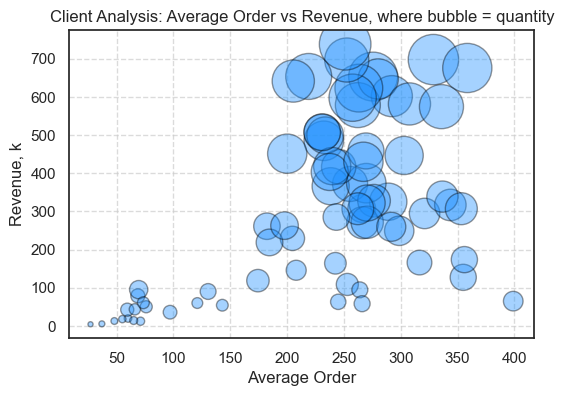

In [653]:
plt.figure(figsize=(6,4))

plt.scatter(clients['average_order'], clients['revenue_k'], s=clients['quantity'] / 2,
            alpha=0.4, c='dodgerblue', edgecolors='black')

plt.title("Client Analysis: Average Order vs Revenue, where bubble = quantity")
plt.xlabel("Average Order")
plt.ylabel("Revenue, k")
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

## Q6 Summary:
This scatter plot shows a clear positive relationship between Average Order and Total Revenue. The chart reveals distinct customer segments:
* Heavy Buyers make large orders of 250-400 units per order and generate high revenue of USD 500-750K
* Medium Buyers around 200-300 units per order with USD 300-600K revenue
* Small Buyers have orders under 100 units per order with lower revenue.

The bubble sizes indicate quantity purchased, and generally larger clients buy more items.

An interesting pattern is that some clients with very high average orders have relatively low total revenue, suggesting they are premium customers who purchase expensive items but infrequently. This visualization effectively segments the customer base and shows how order value directly impacts overall business revenue.

# Overall Project Conclusion:
* March 2024 data highlights a volatile yet concentrated audio equipment market. Confirmed orders consistently outnumber cancellations, with peak activity on March 13–14 driven partly by CRM-related reorders. Daily revenue closely follows order volume, while average order value varies, reflecting diverse customer and order types.
* Wired audio equipment dominates product sales, led by headphones, followed by karaoke systems, headsets, and speakers. Brand analysis shows a long-tail distribution: a few major players: JBL, Heco, Klipsch, Yamaha, KEF - they showed high revenue and more unique clients. But the majority of brands remained in low revenue - client zone.
* Customer segmentation identifies Heavy, Medium, and Small Buyers, with larger orders driving the majority of revenue. Overall, the market combines high volatility, concentrated brand leadership, and clear segmentation across products and customer behavior.
* The following business recommendations may be given:
    * Improve CRM reliability to prevent cancellations and reduce forced reorders.
    * Prioritize inventory and marketing for high-demand wired audio products and leading brands.
    * Focus on premium and high-volume clients to maximize revenue per transaction.
    * Monitor smaller brands and niche segments for growth opportunities without overextending resources.
    * Track AOV fluctuations to understand customer behavior and optimize pricing strategies.